# 1. Business Understanding

#### 1.1. Project Overview

Tanzania is a country with a population of 57 million. It faces significant challenges in providing clean and reliable water to its population.
The country has established numerous water points to meet this need but many of these water points are not fully functional, with some requiring repairs and others have failed entirely.
This project aims to predict the functionality of these water pumps, distingishing between those that are fully functional, those that need repairs and those that do not work at all

#### 2.1. Objective
The primary objective is to develop a predictive model that can accurately classify the operational status of water pumps into one of three categories:
- Functional: The water pump is fully operational and provides clean water.
- Needs repair: The water pump is operational but requires some maintenance or repair to ensure optimal performance.
- Non-Functional: The water pump has failed and is not providing water.

#### 3.1. Stakeholders
- Non-Governmental Organizations(NGOs): Various NGOs involved in providing support for wells needing repairs in Tanzania
- Government of Tanzania throught the Tanzanian Ministry of Water: The government is looking to find patterns in non-functional wells to influence how new wells are built

#### 4.1. Key Questions
1. What are the critical factors influencing the functionality of water pumps in Tanzania?
2. Does the year of construction of the water pump affect its current functionality?
3. Are there specific regions or districts that consistently have non functional or poorly performing water pumps?


# 2. Data Understanding

#### Import the necessary python packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Data

In [2]:
# Viewing the first five rows of the dataset

# Load data
train_values = pd.read_csv('Data/Training-set-values.csv')
train_labels = pd.read_csv('Data/Training-set-labels.csv')
test_data = pd.read_csv('Data/Test-set-values.csv')


# Display the first few rows of the train-values dataset
print("Train Values:")
display(train_values.head())

# Display the first few rows of the train-labels dataset
print("\nTrain Labels:")
display(train_labels.head())

# Check the shape of the datasets
print("\nShape of Train Values:", train_values.shape)
print("Shape of Train Labels:", train_labels.shape)

Train Values:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe



Train Labels:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Shape of Train Values: (59400, 40)
Shape of Train Labels: (59400, 2)


>  **Key Insights:**
> - Based on the above, I can confirm that we have a large dataset with 59,400 water points, which is good for training a predictive model.
>- The datatset includes various types of features, such as numerical, categorical and geographical
>- I have also identified that `status_group` is my primary target variable


#### Inspecting the Loaded Data

In [3]:
# Get summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
display(train_values.describe())

# Check for missing values in the dataset
print("\nMissing Values in Train Values:")
display(train_values.isnull().sum())

# Check for data types of each feature
print("\nData Types in Train Values:")
display(train_values.dtypes)

Summary Statistics for Numerical Features:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000



Missing Values in Train Values:


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_


Data Types in Train Values:


id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

> **Key Insights:**
> - Based on the above, `amount_tsh` has a high proportion of zero values which could indicate that many water points have no water.
> - Some key features such as `scheme_name` and `scheme_management` have missing data which needs to be addressed.
> - Feature `date_recorded` has been stored as an `object` and needs to be converted to a `datetime` for analysis.


#### Target Variable Exploration


Distribution of Target Variable:


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64


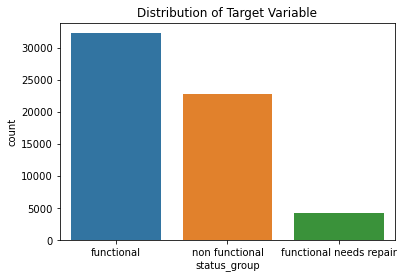

In [4]:
# Merge train-values and train-labels to explore the target variable
train_data = train_values.merge(train_labels, on='id')


# Display the distribution of the target variable
print("\nDistribution of Target Variable:")
display(train_data['status_group'].value_counts())

# Calculate the distribution of the target variable in percentages
target_distribution_percentage = (train_labels['status_group'].value_counts(normalize=True) * 100)

# Display the output
print(target_distribution_percentage)

# Plot the distribution of the target variable
sns.countplot(x='status_group', data=train_data)
plt.title("Distribution of Target Variable")
plt.show()

> **Key Insights:**
> - From the above 32,259 pumps (54.3%) are fully operational, 22,824 pumps (38.4%) are not working at all while 4,317 pumps (7.3%) are operational but require some repairs.
>> - This shows that there is a significant number of pumps that are non-functional or needs repairs.
>> - The functional but needs repair class shows that it will be harder to predict due to its smaller size, making it critical to capture features that indicate early signs of wear or need for repair.
>> - Since there are more pumps that are not working at all, it will be crucial to predict the need for repairs before complete failure so that maintenance can be done early.

#### Bivariate Analysis


Correlation Matrix:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


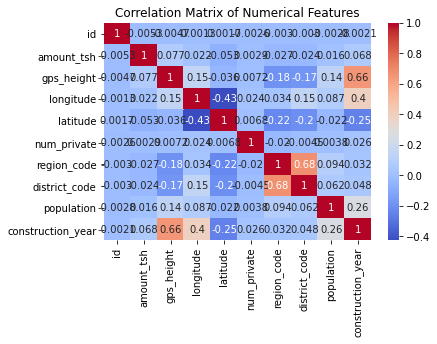


Grouped Analysis by Target Variable:


status_group
functional                 461.798235
functional needs repair    267.071577
non functional             123.481230
Name: amount_tsh, dtype: float64

In [5]:
# Correlation matrix for numerical features
print("\nCorrelation Matrix:")
corr_matrix = train_data.corr()
display(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Grouped analysis for categorical features
# Example: Grouping by 'status_group' and checking the mean of a numerical feature
print("\nGrouped Analysis by Target Variable:")
display(train_data.groupby('status_group')['amount_tsh'].mean())

> **Key Observations on the Correlation Matrix:**
> - `gps_height` and `construction_year` have a strong positive correlation of 0.659 which is closer to +1. This suggests that newer constructions tend to be at higher altitudes.
> - `longitude` and `construction_year` have a moderate positive correlation of 0.397, wich indicates that newer costructions might be located in specific places.
> - Most other features have low or no significant correlation with each other, as indicated by values close to 0

> **Key Observations on the Grouped Analysis by Target Variable:**
> - I performed an analysis showing the average `amount_tsh` for each category in the `status_group` target variable:
> - For `functional` pumps requires an average `amount_tsh` of 461.80 Tsh.
> - For `functional needs repair` pumps requires an average `amount_tsh` of 267.07 Tsh.
> - For `non functional` pumps requires an average `amount_tsh` of 123.48 Tsh.
>> - From the above we can see that functional water pumps tend to have a higher `amount_tsh`.
>> - This means that better-funded pumps are more likely to be functional while lower funded pumps are more likely to be non-functional or needs repair.

#### Missing Values Analysis


Missing Data by Count
funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

Missing Data by Percentage
funder                6.119529
installer             6.153199
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.526936
scheme_name          47.417508
permit                5.144781
dtype: float64


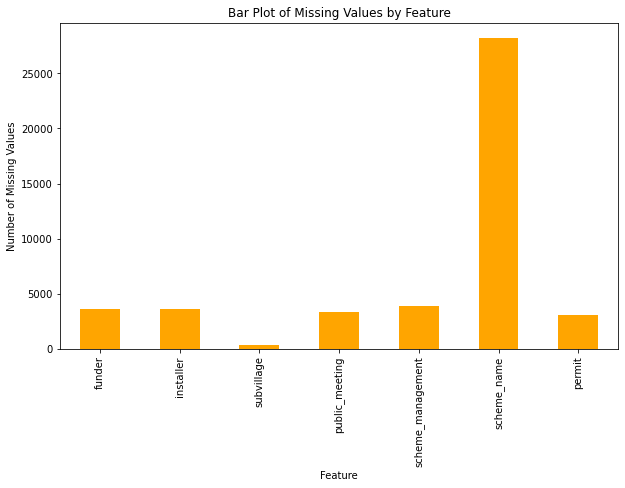


Missing Data by Count
funder                869
installer             877
subvillage             99
public_meeting        821
scheme_management     969
scheme_name          7092
permit                737
dtype: int64

Missing Data by Percentage
funder                5.851852
installer             5.905724
subvillage            0.666667
public_meeting        5.528620
scheme_management     6.525253
scheme_name          47.757576
permit                4.962963
dtype: float64


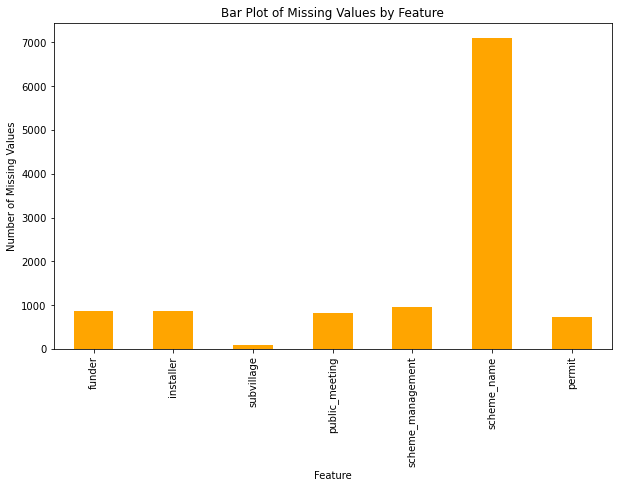

In [6]:
def missing_data_summary(data):
    # Calculate missing data counts
    missing_data = data.isnull().sum()
    
    if missing_data[missing_data > 0].empty:
        print("No missing data.")
        return
    
    # Display missing data by count
    print("\nMissing Data by Count")
    print(missing_data[missing_data > 0])
    
    # Calculate and display missing data by percentage
    missing_percentage = (missing_data / len(data)) * 100
    print("\nMissing Data by Percentage")
    print(missing_percentage[missing_data > 0])
    
    # Plot bar graph of missing data
    plt.figure(figsize=(10, 6))
    missing_data[missing_data > 0].plot(kind='bar', color='orange')
    plt.title("Bar Plot of Missing Values by Feature")
    plt.ylabel("Number of Missing Values")
    plt.xlabel("Feature")
    plt.show()

# Apply the function to both train and test data
missing_data_summary(train_data)
missing_data_summary(test_data)

> **Key Insights:**
>- `scheme_name` has the most significant proportion of missing values almost 47.4% of the data.
> - `funder` and `installer` seem like key features that could indicate who is responsible for the functionality of the water points.
> - `public_meeting` and `permit` are categorical features with missing values which might reflect the administration or governance aspects of water points

#### Bar Plots to understand the relationships between categorical features and `status_group`


 Top Category of: funder


Index(['Government Of Tanzania', 'Danida', 'Hesawa', 'Rwssp', 'World Bank',
       'Kkkt', 'World Vision', 'Unicef', 'Tasaf', 'District Council'],
      dtype='object')

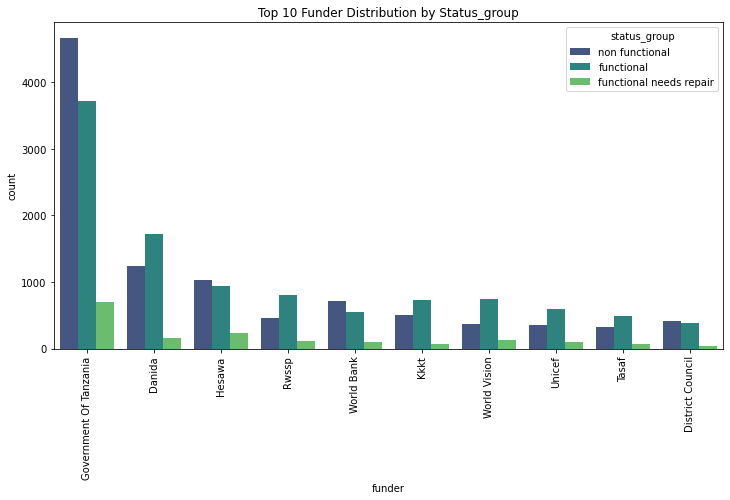


 Top Category of: installer


Index(['DWE', 'Government', 'RWE', 'Commu', 'DANIDA', 'KKKT', 'Hesawa', '0',
       'TCRS', 'Central government'],
      dtype='object')

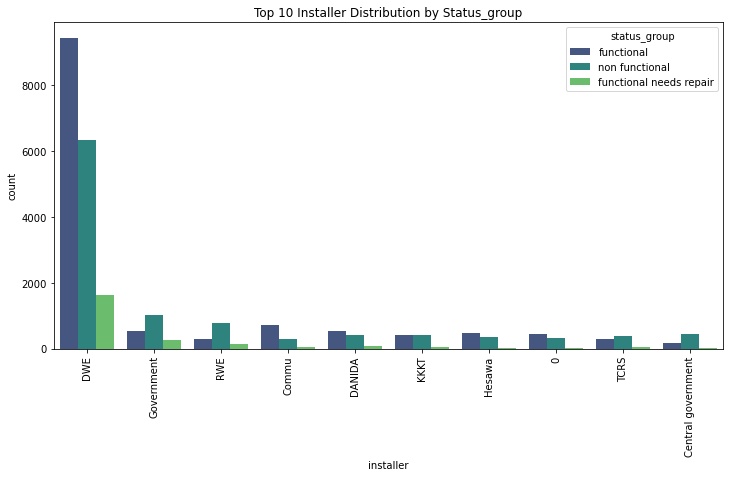


 Top Category of: scheme_management


Index(['VWC', 'WUG', 'Water authority', 'WUA', 'Water Board', 'Parastatal',
       'Private operator', 'Company', 'Other', 'SWC'],
      dtype='object')

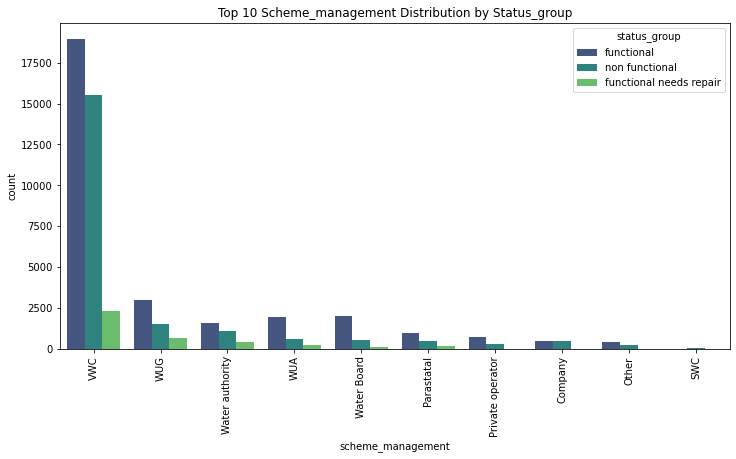

In [7]:
def plot_bar(train_data, feature, target='status_group', top_n=10):
    plt.figure(figsize=(12, 6))
    top_categories = train_data[feature].value_counts().nlargest(top_n).index
    # Display the top categories and their counts
    print(f"\n Top Category of: {feature}")
    display(top_categories)
    sns.countplot(data=train_data[train_data[feature].isin(top_categories)], 
                  x=feature, hue=target, palette='viridis', order=top_categories)
    
    plt.title(f'Top {top_n} {feature.capitalize()} Distribution by {target.capitalize()}')
    plt.xticks(rotation=90)
    plt.show()

# Bar plots for the top 10 'funder', 'installer', and 'scheme_management'
plot_bar(train_data, 'funder', top_n=10)
plot_bar(train_data, 'installer', top_n=10)
plot_bar(train_data, 'scheme_management', top_n=10)


> **Key Insights:**
>> 1) For the top 10 `funders`:
>>-  We can see that Government of Tanzania might have a significant impact on both the status of the water pumps that are `funnctional` and `non functional`.
>> - Danida, Hesawa, and World Bank are also prominent funders, possibly showing a trend where certain funders have better or worse outcomes in terms of water pump functionality.
>>>2) For the top 10 `installers`:
>>> - DWE and Government are key players in the installation of water pumps. The functionality of pumps installed by these entities can give insights into their effectiveness.
>>> - Comparing the distribution of `status_group` across these installers can show if certain installers have a better success rate.
>>>> 3) For the 10 `scheme_management`:
>>>> - VWC and WUG seem to be the most common scheme management organizations. Their success rate in terms of pump functionality can be vital for assessing the effectiveness of community-driven water management.
>>>> - This distribution can indicate which management schemes are more likely to maintain functional pumps.

#### Box Plots to understand the relationship between numerical features and `status_group`

Unique Categories of Status_group:
['functional' 'non functional' 'functional needs repair']

Amount_tsh Summary by Status_group:
                           count        mean          std  min  25%  50%   75%       max
status_group                                                                            
functional               32259.0  461.798235  3889.735284  0.0  0.0  0.0  50.0  350000.0
functional needs repair   4317.0  267.071577  1925.026420  0.0  0.0  0.0  50.0  100000.0
non functional           22824.0  123.481230  1110.120571  0.0  0.0  0.0   0.0  117000.0



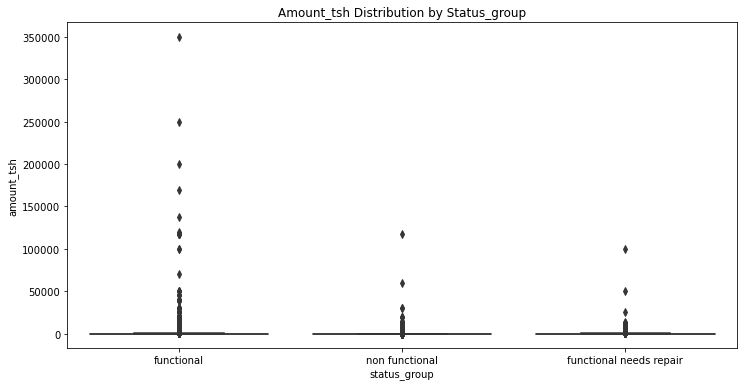

Unique Categories of Status_group:
['functional' 'non functional' 'functional needs repair']

Population Summary by Status_group:
                           count        mean         std  min  25%   50%    75%      max
status_group                                                                            
functional               32259.0  187.553303  513.198991  0.0  0.0  40.0  200.0  30500.0
functional needs repair   4317.0  175.102154  433.033756  0.0  0.0  25.0  245.0  15300.0
non functional           22824.0  170.016430  413.094978  0.0  0.0   1.0  230.0   9865.0



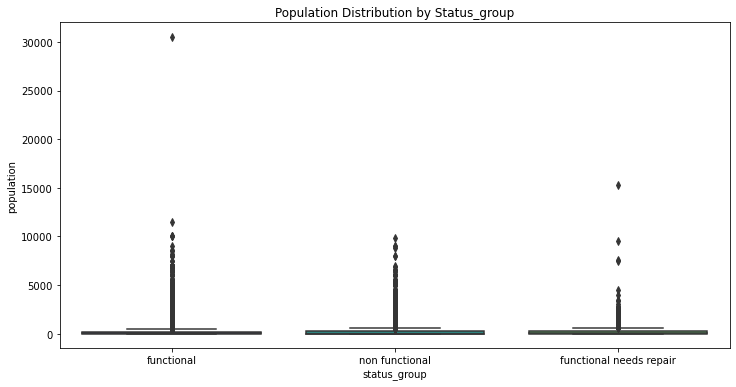

In [8]:
# Define a function to plot box plots for numerical variables 
def plot_box(train_data, feature, target='status_group'):
    # Print unique categories of the target variable
    print(f"Unique Categories of {target.capitalize()}:")
    print(train_data[target].unique())
    print()
    
    # Print summary statistics of the feature by target variable
    print(f"{feature.capitalize()} Summary by {target.capitalize()}:")
    print(train_data.groupby(target)[feature].describe())
    print()

    # Plot the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_data, x=target, y=feature, palette='viridis')
    plt.title(f'{feature.capitalize()} Distribution by {target.capitalize()}')
    plt.show()

# Box plots for 'amount_tsh' and 'population'
plot_box(train_data, 'amount_tsh')
plot_box(train_data, 'population')



>**Key Insights:**
>> 1) Insights on `amount_tsh`:
>>- The median for `functional` pumps is higher compared to othe rgroups. This may suggest that functional pumps tend to have more water available, whic indicates that these pumps are better maintained or located in areas with higher water availability.
>>- The median for `non functional` pumps is significantly lower, suggesting a strong correlation between low water availability and pump failure.
>> - There is also presence of outliers in `non functional` and `functional needs repair` pumps, This could represent pumps that have unusually high or low water amounts despite their `status_group`. This could be due to seasonal changes in weather.
>>> 2) Insights on `population`:
>>> - The median `population` served by functional pumps is higher compared to other groups. This implies that pumps serving larger populations are more likely to be `functional`, possibly due to prioritization of maintenance in areas with higher demand.
>>> - The median `population` for `non functional` pumps is the lowests, indicating thst pumps serving smaller populations might be prone to neglect or failure
>>> - We can also notice that for `non functional` pumps they have a narrower IQR which means that the pumps tend to serve smaller, more consistent population sizes, possibly in rural or less prioritized areas.
>>> - There are outliers in the population data for all three groups, especially in the `functional` group. These outliers could represent pumps serving very large or very small populations, possibly due to extreme cases where a single pump is critical for a large community or only serves a small number of people due to geographic isolation.

# 3. Data Preparation

In this section we will be preparing the data to address missing values, skewness and outliers, encooding of categorical variables and feature scaling

#### Import the necessary packages

In [9]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#### Handle Missing Data
I will call the function `missing_data_summary(train_data)` so that we can review the data that is missing.


Missing Data by Count
funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

Missing Data by Percentage
funder                6.119529
installer             6.153199
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.526936
scheme_name          47.417508
permit                5.144781
dtype: float64


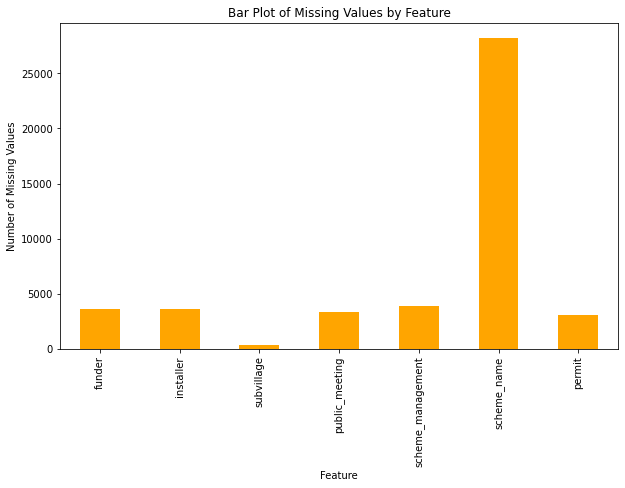




Missing Data by Count
funder                869
installer             877
subvillage             99
public_meeting        821
scheme_management     969
scheme_name          7092
permit                737
dtype: int64

Missing Data by Percentage
funder                5.851852
installer             5.905724
subvillage            0.666667
public_meeting        5.528620
scheme_management     6.525253
scheme_name          47.757576
permit                4.962963
dtype: float64


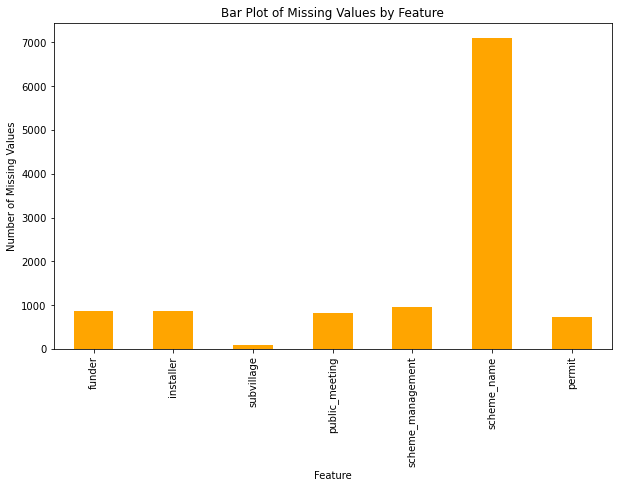

In [10]:
data = train_data
missing_data_summary(train_data)
print("\n")
data = test_data
missing_data_summary(test_data)



##### Handling Strategy 

1. From the above I can see that `scheme_name` has the highest percentage of missing data of 47.42%, so I have decided that I will drop the feature since almost half the values are missing. This will avoid introducing biasness in the model.

In [11]:
train_data.drop(columns=['scheme_name'], inplace=True)
test_data.drop(columns=['scheme_name'], inplace=True)


2. I will replace missing values of `funder` , `installer`,`subvillage`, `scheme_management` with 'Unknown' so that it indicates that the funders of those water points are Unknown

In [12]:
print("Missing values in 'amount_tsh':", train_data['amount_tsh'].isnull().sum())
print("Missing values in 'population':", train_data['population'].isnull().sum())


Missing values in 'amount_tsh': 0
Missing values in 'population': 0


In [13]:
train_data['funder'].fillna('Unknown', inplace=True)
train_data['installer'].fillna('Unknown', inplace=True)
train_data['subvillage'].fillna('Unknown', inplace=True)
train_data['scheme_management'].fillna('Unknown', inplace=True)


test_data['funder'].fillna('Unknown', inplace=True)
test_data['installer'].fillna('Unknown', inplace=True)
test_data['subvillage'].fillna('Unknown', inplace=True)
test_data['scheme_management'].fillna('Unknown', inplace=True)


3. Since `permit` is a categorical feature that is either in True or False I will create a new binary feature that indicates whether the `permit` value was missing so that I can learn whether the inclusion of a permit increases the chances of better functioning water pump.

In [14]:
train_data['permit'].fillna(train_data['permit'].mode()[0], inplace=True)
test_data['permit'].fillna(test_data['permit'].mode()[0], inplace=True)


print("Missing values in 'permit' in the training data:", train_data['permit'].isnull().sum())
print("Missing values in 'permit' in the test data:", test_data['permit'].isnull().sum())



Missing values in 'permit' in the training data: 0
Missing values in 'permit' in the test data: 0


In [15]:
print("Missing values in 'amount_tsh':", train_data['amount_tsh'].isnull().sum())
print("Missing values in 'population':", train_data['population'].isnull().sum())


Missing values in 'amount_tsh': 0
Missing values in 'population': 0


4. For the `public_meeting` missing values I have replaced them the most occcuring values in the column

In [16]:
train_data['public_meeting'].fillna(train_data['public_meeting'].mode()[0], inplace=True)
test_data['public_meeting'].fillna(test_data['public_meeting'].mode()[0], inplace=True)


##### Verification

In [17]:
# Check for any remaining missing values
missing_after = train_data.isnull().sum()
missing_after = test_data.isnull().sum()


# Filter out columns with missing values
remaining_missing = missing_after[missing_after > 0]

if remaining_missing.empty:
    print("Remaining Missing Values: 0")
else:
    print("Remaining Missing Values:\n", remaining_missing)


Remaining Missing Values: 0


#### Handling Skewness and Outliers

##### Identify and Visualize skewness

Skewness of amount_tsh in the training data: 57.8077999458852
Skewness of population in the training data: 12.660713588843592
Skewness of amount_tsh in the test data: 43.85786088361004
Skewness of population in the test data: 8.217148256491978


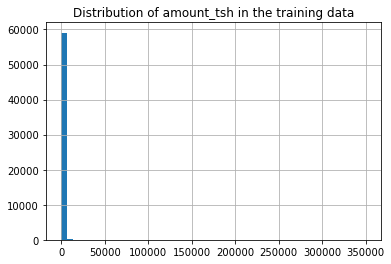

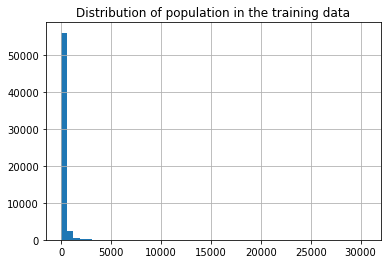

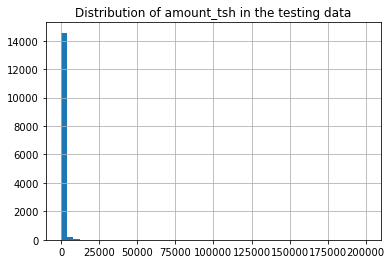

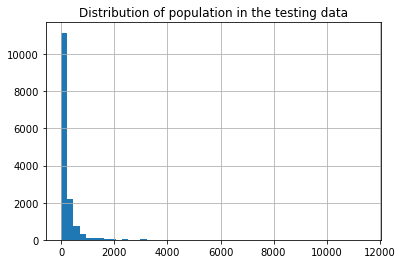

In [18]:
# Check skewness
print(f"Skewness of amount_tsh in the training data: {train_data['amount_tsh'].skew()}")
print(f"Skewness of population in the training data: {train_data['population'].skew()}")

# Check skewness
print(f"Skewness of amount_tsh in the test data: {test_data['amount_tsh'].skew()}")
print(f"Skewness of population in the test data: {test_data['population'].skew()}")

# Plot histograms
train_data['amount_tsh'].hist(bins=50)
plt.title('Distribution of amount_tsh in the training data')
plt.show()

train_data['population'].hist(bins=50)
plt.title('Distribution of population in the training data')
plt.show()

# Plot histograms
test_data['amount_tsh'].hist(bins=50)
plt.title('Distribution of amount_tsh in the testing data')
plt.show()

test_data['population'].hist(bins=50)
plt.title('Distribution of population in the testing data')
plt.show()


##### Apply Log Transformation
>- Due to the high skewness of both `amount_tsh` and `population` I have decided to apply a log transformation on both features so as to normalize the distribution of these features.

In [19]:
# Apply log1p transformation (log(1 + x)) to handle skewness
train_data['amount_tsh_log'] = np.log1p(train_data['amount_tsh'])
train_data['population_log'] = np.log1p(train_data['population'])

# Check skewness after transformation
print(f"Skewness of log-transformed amount_tsh of the train_data: {train_data['amount_tsh_log'].skew()}")
print(f"Skewness of log-transformed population of the train_data: {train_data['population_log'].skew()}")

# Apply log1p transformation (log(1 + x)) to handle skewness
test_data['amount_tsh_log'] = np.log1p(test_data['amount_tsh'])
test_data['population_log'] = np.log1p(test_data['population'])

# Check skewness after transformation
print(f"Skewness of log-transformed amount_tsh of the test_data: {test_data['amount_tsh_log'].skew()}")
print(f"Skewness of log-transformed population of the test_data: {test_data['population_log'].skew()}")


Skewness of log-transformed amount_tsh of the train_data: 1.3370903407288008
Skewness of log-transformed population of the train_data: 0.1414983993018132
Skewness of log-transformed amount_tsh of the test_data: 1.336826921282946
Skewness of log-transformed population of the test_data: 0.1730538071726138


##### Verification

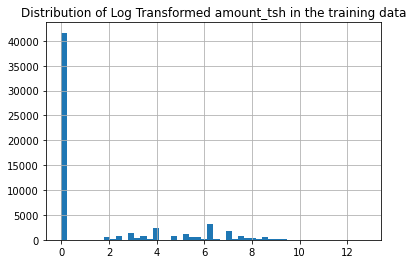

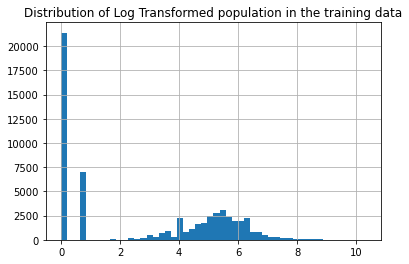

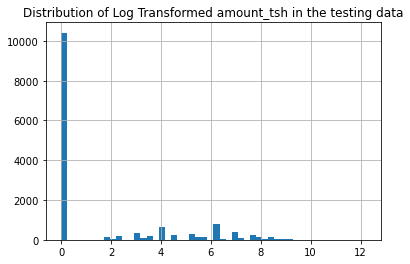

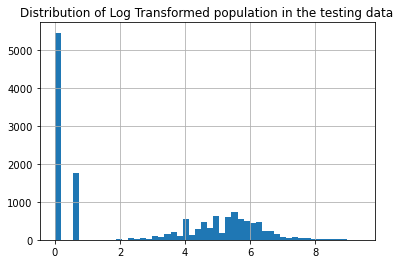

In [20]:
# Plot histograms to visualize the transformed distributions
train_data['amount_tsh_log'].hist(bins=50)
plt.title('Distribution of Log Transformed amount_tsh in the training data')
plt.show()

train_data['population_log'].hist(bins=50)
plt.title('Distribution of Log Transformed population in the training data')
plt.show()

# Plot histograms to visualize the transformed distributions
test_data['amount_tsh_log'].hist(bins=50)
plt.title('Distribution of Log Transformed amount_tsh in the testing data')
plt.show()

test_data['population_log'].hist(bins=50)
plt.title('Distribution of Log Transformed population in the testing data')
plt.show()


##### Handling Outliers

In [21]:
# Function to remove outliers
def remove_outliers(train_data, column):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data = train_data[(train_data[column] >= lower_bound) & (train_data[column] <= upper_bound)]
    return train_data

# Remove outliers from the log-transformed columns
train_data = remove_outliers(train_data, 'amount_tsh_log')
train_data = remove_outliers(train_data, 'population_log')

# Remove outliers from the log-transformed columns
test_data = remove_outliers(test_data, 'amount_tsh_log')
test_data = remove_outliers(test_data, 'population_log')

##### Verification


In [22]:
# Recalculate skewness
print(f"Skewness of log-transformed amount_tsh after outlier removal of the train_data: {train_data['amount_tsh_log'].skew()}")
print(f"Skewness of log-transformed population after outlier removal of the train_data: {train_data['population_log'].skew()}")

# Recalculate skewness
print(f"Skewness of log-transformed amount_tsh after outlier removal of the test_data: {test_data['amount_tsh_log'].skew()}")
print(f"Skewness of log-transformed population after outlier removal of the test_data: {test_data['population_log'].skew()}")


Skewness of log-transformed amount_tsh after outlier removal of the train_data: 1.379494824458808
Skewness of log-transformed population after outlier removal of the train_data: 0.15836927112689408
Skewness of log-transformed amount_tsh after outlier removal of the test_data: 1.3476391273119728
Skewness of log-transformed population after outlier removal of the test_data: 0.18498520326537424


#### Encoding Categorical Variables

In [23]:
def data_of_categorical_features(data, features):

  for feature in features:
    print(f"Unique values for {feature}:")
    print(data[feature].unique())
    print()

    print(f"Sample values for {feature}:")
    print(data[[feature]].head())
    print()
    
categorical_features = ['funder', 'installer', 'scheme_management', 'permit']
data_of_categorical_features(train_data, categorical_features)
data_of_categorical_features(test_data, categorical_features)

Unique values for funder:
['Grumeti' 'Lottery Club' 'Unicef' ... 'Dina' 'Brown' 'Samlo']

Sample values for funder:
                funder
1              Grumeti
2         Lottery Club
3               Unicef
4          Action In A
5  Mkinga Distric Coun

Unique values for installer:
['GRUMETI' 'World vision' 'UNICEF' ... 'Dina' 'brown' 'SELEPTA']

Sample values for installer:
      installer
1       GRUMETI
2  World vision
3        UNICEF
4       Artisan
5           DWE

Unique values for scheme_management:
['Other' 'VWC' 'Unknown' 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']

Sample values for scheme_management:
  scheme_management
1             Other
2               VWC
3               VWC
4           Unknown
5               VWC

Unique values for permit:
[ True False]

Sample values for permit:
   permit
1    True
2    True
3    True
4    True
5    True

Unique values for funder:
['Dmdd' 'Government Of Tanzania' 'Unknow

From the above output, I have decided to use the following techniques of encoding as follows:

##### One-Hot Encoding features `funder`, `installer` and `scheme_management`
>- This is because the above features have many unique values. One-Hot Encoding is suitable when handling categorical variables with multiple distinct values.
> - I realized from the above that `funder` and `installer` have high cardinality, meaning that they have many categories which would lead to high memory usage and sparse data.
>>- To address this I will include Frequency Encoding to deal with the high cardinality.

##### Frequency Encoding for Training Data

In [24]:
# Frequency Encoding for 'funder'
funder_freq = train_data['funder'].value_counts()
train_data['funder_encoded'] = train_data['funder'].map(funder_freq)
test_data['funder_encoded'] = test_data['funder'].map(funder_freq)

# Frequency Encoding for 'installer'
installer_freq = train_data['installer'].value_counts()
train_data['installer_encoded'] = train_data['installer'].map(installer_freq)
test_data['installer_encoded'] = test_data['installer'].map(installer_freq)

# Frequency Encoding for 'scheme_management'
scheme_management_freq = train_data['scheme_management'].value_counts()
train_data['scheme_management_encoded'] = train_data['scheme_management'].map(scheme_management_freq)
test_data['scheme_management_encoded'] = test_data['scheme_management'].map(scheme_management_freq)

# Check the first few rows to verify the encoding
print(train_data[['funder_encoded', 'installer_encoded', 'scheme_management_encoded']].head())
print(test_data[['funder_encoded', 'installer_encoded', 'scheme_management_encoded']].head())


   funder_encoded  installer_encoded  scheme_management_encoded
1              53                 39                        765
2               8                408                      35440
3             990                183                      35440
4               1                135                       3863
5             150              16848                      35440
   funder_encoded  installer_encoded  scheme_management_encoded
0           162.0               83.0                       1612
1          8910.0            16848.0                      35440
2          3616.0             3635.0                      35440
3            33.0               33.0                      35440
4            16.0               16.0                       2716


##### Handle Missing Categorical Values

In [25]:
# Filling missing values after encoding (optional step based on strategy)
train_data['funder_encoded'].fillna(0, inplace=True)
test_data['funder_encoded'].fillna(0, inplace=True)

train_data['installer_encoded'].fillna(0, inplace=True)
test_data['installer_encoded'].fillna(0, inplace=True)

train_data['scheme_management_encoded'].fillna(0, inplace=True)
test_data['scheme_management_encoded'].fillna(0, inplace=True)


##### Drop Original Categorical Columns

In [26]:
# Drop original columns after encoding
train_data.drop(columns=['funder', 'installer', 'scheme_management'], inplace=True)
test_data.drop(columns=['funder', 'installer', 'scheme_management'], inplace=True)

# Check the final structure
print(train_data.head())
print(test_data.head())


      id  amount_tsh date_recorded  gps_height  longitude   latitude              wpt_name  num_private                    basin   subvillage   region  region_code  district_code        lga        ward  population  public_meeting              recorded_by  permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group    status_group  amount_tsh_log  population_log  funder_encoded  installer_encoded  scheme_management_encoded
1   8776         0.0    2013-03-06        1399  34.698766  -2.147466              Zahanati            0            Lake Victoria      Nyamara     Mara           20              2  Serengeti       Natta         280            True  GeoData Consultants Ltd    True               2010         gravity               gravity       

##### Label Encoding feature `permit` and `permit_missing`
>- Since `permit` and `permit_missing` have values based on True or False, it is easier to encode it with Label Encoding. This allows the feture to represent 1 as True and 0 as False.

In [27]:
# Binary Encoding 

label_encoder = LabelEncoder()
train_data['permit_encoded'] = label_encoder.fit_transform(train_data['permit'])
# Create 'permit_missing' column
train_data['permit_missing'] = train_data['permit'].isnull().astype(int)
train_data['permit_missing'] = train_data['permit_missing'].astype(int)

test_data['permit_encoded'] = label_encoder.fit_transform(test_data['permit'])
# Create 'permit_missing' column
test_data['permit_missing'] = test_data['permit'].isnull().astype(int)
test_data['permit_missing'] = test_data['permit_missing'].astype(int)

#### Verification

In [28]:
# Check the transformed data
print(train_data.head())
print(test_data.head())


      id  amount_tsh date_recorded  gps_height  longitude   latitude              wpt_name  num_private                    basin   subvillage   region  region_code  district_code        lga        ward  population  public_meeting              recorded_by  permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group    status_group  amount_tsh_log  population_log  funder_encoded  installer_encoded  scheme_management_encoded  permit_encoded  permit_missing
1   8776         0.0    2013-03-06        1399  34.698766  -2.147466              Zahanati            0            Lake Victoria      Nyamara     Mara           20              2  Serengeti       Natta         280            True  GeoData Consultants Ltd    True               2010         grav

#### Feature Scaling

In [29]:
# Select the numerical features
numerical_features = ['amount_tsh', 'population']

# Convert the columns to numeric data type, handling potential errors
for feature in numerical_features:
    train_data[feature] = pd.to_numeric(train_data[feature], errors='coerce')
    test_data[feature] = pd.to_numeric(test_data[feature], errors='coerce')

# Fill missing values with appropriate strategies
train_data['amount_tsh'].fillna(0, inplace=True)
train_data['population'].fillna(train_data['population'].median(), inplace=True)

# Apply MinMaxScaler to the numerical features
scaler = MinMaxScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Check the scaled values
print("Scaled 'amount_tsh' in train data:\n", train_data['amount_tsh'].head())
print("Scaled 'population' in train data:\n", train_data['population'].head())

print("Scaled 'amount_tsh' in test data:\n", test_data['amount_tsh'].head())
print("Scaled 'population' in test data:\n", test_data['population'].head())

Scaled 'amount_tsh' in train data:
 1    0.0000
2    0.0125
3    0.0000
4    0.0000
5    0.0100
Name: amount_tsh, dtype: float64
Scaled 'population' in train data:
 1    0.009180
2    0.008197
3    0.001902
4    0.000000
5    0.000033
Name: population, dtype: float64
Scaled 'amount_tsh' in test data:
 0    0.00
1    0.00
2    0.00
3    0.00
4    0.25
Name: amount_tsh, dtype: float64
Scaled 'population' in test data:
 0    0.010525
1    0.009836
2    0.016393
3    0.008197
4    0.001967
Name: population, dtype: float64


> I have chosen to use Min-Max scaler to scale `amount_tsh` and `population` because I want ti retain the relative differences in the data but in a smaller scale

#### Encoding of Target Variable

In [30]:
label_encoder = LabelEncoder()

# Fit and transform the target variable
train_labels['status_group_encoded'] = label_encoder.fit_transform(train_labels['status_group'])

# Check the unique classes and their corresponding encoded values
print("Classes and their encoded values:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
# Check the transformed data
print(train_data.head())
print(test_data.head())

Classes and their encoded values: {'functional': 0, 'functional needs repair': 1, 'non functional': 2}
      id  amount_tsh date_recorded  gps_height  longitude   latitude              wpt_name  num_private                    basin   subvillage   region  region_code  district_code        lga        ward  population  public_meeting              recorded_by  permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group    status_group  amount_tsh_log  population_log  funder_encoded  installer_encoded  scheme_management_encoded  permit_encoded  permit_missing
1   8776      0.0000    2013-03-06        1399  34.698766  -2.147466              Zahanati            0            Lake Victoria      Nyamara     Mara           20              2  Serengeti  

> - It is important to encode the target variable `status_group` because it contains categorical values and for modeling to be successful all categorical features being used in the project need to be changed to numerical values.

#### Feature Selection

>- From the above I have chosen the following features as my predictors while my predicted value is `train_data['status_group_encoded']`:
>>1. `funder_encoded`
>>2. `installer_encoded`
>>3. `scheme_management_encoded`
>>4. `permit_encoded`
>>5. `permit_missing`
>>6. `amount_tsh`
>>7. `population`


# 4. Modeling

#### Importing necessary packages

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from collections import Counter

#### Preparing features for training

In [32]:
# Merge train_data with train_labels on 'id'
train_data = train_data.merge(train_labels, on='id')

# Define features and target variable
X = train_data[['funder_encoded', 'installer_encoded', 'scheme_management_encoded', 'permit_encoded', 'permit_missing', 'amount_tsh', 'population']]
y = train_data['status_group_encoded']

# Define features for the test data
# X_test = test_data[['funder_encoded', 'installer_encoded', 'scheme_management_encoded', 'permit_encoded', 'permit_missing', 'amount_tsh', 'population']]


# Check for any discrepancies
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (57589, 7)
Shape of y: (57589,)


#### Splitting Data

> - Currently my data is already split into train_data and test_data. However I will split it further so that I can be able to validate my model and ensure that it performs well.
>- This involves splitting the `train_data` into two: for training and for validation. 

In [33]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for validation

>For the above I will use:
> - `X_train` and `y_train` to train my models.
> - `X_val` and `y_val` to validate my models.
> - `test_data` to make predictions on my final model



#### Baseline Model - Logistic Regression

Logistic Regression Model:
Accuracy Score: 0.5235283903455461
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.82      0.65      6123
           1       0.00      0.00      0.00       900
           2       0.44      0.23      0.30      4495

    accuracy                           0.52     11518
   macro avg       0.33      0.35      0.32     11518
weighted avg       0.46      0.52      0.47     11518



c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


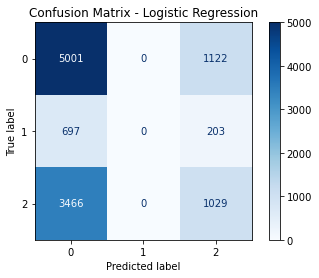

In [46]:
# Initialize the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_val_pred = logistic_model.predict(X_val)

# Evaluate the model
print("Logistic Regression Model:")
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))


# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



>**Key Evaluation Insights**
> - I got an accuracy 0.52. This means that my baseline model was able to correctly classify 52.35% of the water pumps into either functional, non functional and those that need repair.

> - When I encoded the `status_group` to `status_group_encoded` for modeling purposes: 
>>- functional was changed to `0`
>>- functional that needs repair was changed to `1`
>>- non functional was changed to `2`
> - From the above I can see that 55% of the instances predicted as functional pumps. 0% of the instances predicted as functional that needs repair and 44% of the instances predicted as non functional.

> - I can also gather from the above that 82% of the instances correctly identified functional pumps, 0% correctly identified functional that needs repair pumps and 23% correctly identified non functional pumps.
> - I've also realised that the baseline model is not predicting class 1 (functional that needs repair pumps) well.



> **General Observations**
>- From the baseline model above it is evident that class 1(functional that needs repair) pumps is performing poorly on my model based on the precision, recall and F1-score being 0.
>- This may be because that the class is being underrepresented thus the model is not learning enough about it.

#### Second Model - Decision Tree

Decision Tree Accuracy Score: 0.6607049835040806
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      6123
           1       0.30      0.13      0.18       900
           2       0.66      0.61      0.63      4495

    accuracy                           0.66     11518
   macro avg       0.55      0.50      0.51     11518
weighted avg       0.64      0.66      0.65     11518



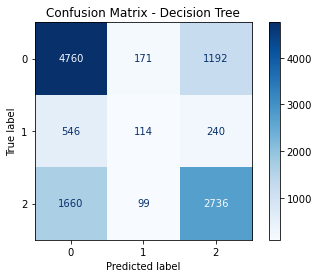

In [47]:
# Initialize and train Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_tree = decision_tree_model.predict(X_val)
print("Decision Tree Accuracy Score:", accuracy_score(y_val, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_val, y_pred_tree))

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_tree)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

>**Key Evaluation Insights**
> - I got an accuracy 0.66. This means that my baseline model was able to correctly classify 66% of the water pumps into either functional, non functional and those that need repair.

> - When I encoded the `status_group` to `status_group_encoded` for modeling purposes: 
>>- functional was changed to `0`
>>- functional that needs repair was changed to `1`
>>- non functional was changed to `2`
> - From the above I can see that 68% of the instances predicted as functional pumps. 30% of the instances predicted as functional that needs repair and 66% of the instances predicted as non functional.

> - I can also gather from the above that 78% of the instances correctly identified functional pumps, 13% correctly identified functional that needs repair pumps and 61% correctly identified non functional pumps.
> - I've also realised that the baseline model is not predicting class 1 (functional that needs repair pumps) well

>**Comaprisons between Logistic Regression Model and Decision Tree**
> - Decision Tree outperforms Logistic Regression in terms of accuracy.
> - Decision Tree performs slightly better with predicting class 1 (functional that needs repair) with a precision of 30% and a recall of 13% as compared to Logistic Regression both of which scored 0%

#### Third Model - Random Forest

Random Forest Accuracy Score: 0.6739885396770272
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6123
           1       0.34      0.13      0.18       900
           2       0.66      0.63      0.65      4495

    accuracy                           0.67     11518
   macro avg       0.57      0.51      0.52     11518
weighted avg       0.66      0.67      0.66     11518



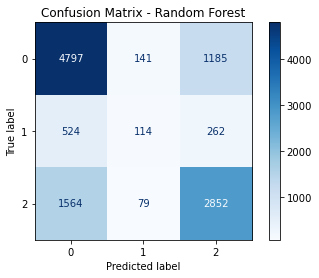

In [48]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
rf_classification_report = classification_report(y_val, y_val_pred_rf)

print(f"Random Forest Accuracy Score: {rf_accuracy}")
print("Random Forest Classification Report:\n", rf_classification_report)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_rf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

>**Key Evaluation Insights**
> - I got an accuracy 0.67. This means that my baseline model was able to correctly classify 67% of the water pumps into either functional, non functional and those that need repair.

> - When I encoded the `status_group` to `status_group_encoded` for modeling purposes: 
>>- functional was changed to `0`
>>- functional that needs repair was changed to `1`
>>- non functional was changed to `2`
> - From the above I can see that 70% of the instances predicted as functional pumps. 34% of the instances predicted as functional that needs repair and 66% of the instances predicted as non functional.

> - I can also gather from the above that 78% of the instances correctly identified functional pumps, 13% correctly identified functional that needs repair pumps and 63% correctly identified non functional pumps.
> - I've also realised that the baseline model is not predicting class 1 (functional that needs repair pumps) well

>**Comaprisons between Logistic Regression Model, Decision Tree & Random Forest**
>- Random Forest has the highest accuracy of (0.6740), which indicates better overall peformance in predicting the target variable.
>- Random Forest also has the best performance in precison, recall and F1-score.

#### Hyperparemter Tuning

>- Based on the comparisons of my three models above, I have decided to proceed with Random Forest Model since it has given us the best results.
>- I will refine the model using GridSearch so as to optimize the model's performance.

In [37]:
# # Define the parameter grid for Random Search
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 6]
# }

# # Initialize the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Set up Randomized Search
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# # Fit Randomized Search to the training data
# random_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params_random = random_search.best_params_
# best_score_random = random_search.best_score_

# print("Best Parameters from Random Search:", best_params_random)
# print("Best Score (Accuracy) from Random Search:", best_score_random)

# # Predict on the validation set using the best model
# best_rf_model_random = random_search.best_estimator_
# y_val_pred_rf_random = best_rf_model_random.predict(X_val)

# # Evaluate the Random Forest model from Random Search
# rf_accuracy_random = accuracy_score(y_val, y_val_pred_rf_random)
# rf_classification_report_random = classification_report(y_val, y_val_pred_rf_random)

# print(f"Tuned Random Forest Accuracy Score (Random Search): {rf_accuracy_random}")
# print("Tuned Random Forest Classification Report (Random Search):\n", rf_classification_report_random)

> Tried using hyper-parameter tuning but it didn't work effectively

#### Cross- Validation

- For Cross-Validation, you need to get the accuracy of your model, in this case Random Forest and you also need to get the baseline accuracy.
- Baseline accuracy simply means the most frequent class in my target variable which is `functional`.
- Cross- Validation assess model performance and helps to validate whether your model is overfitting. 
- **If the model accuracy is higher than the baseline accuracy then the model is effective**

In [40]:
# Define the number of folds (e.g., 10 folds)
cv = 10

# Evaluate the model using cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=cv)

# Print the average accuracy across folds
print(f"Random Forest Average Accuracy (CV): {rf_scores.mean()}")


# Count the occurrences of each class in the training data
y_train_counts = Counter(y_train)

# Find the most frequent class
most_frequent_class = y_train_counts.most_common(1)[0][0]

# Predict the most frequent class for all samples in the validation data
y_pred_baseline = [most_frequent_class] * len(y_val)

# Calculate the baseline accuracy
baseline_accuracy = accuracy_score(y_val, y_pred_baseline)

print("Baseline Accuracy:", baseline_accuracy)

Random Forest Average Accuracy (CV): 0.6729396069236427
Baseline Accuracy: 0.5316027088036117


> From the above I can tell that my model is effective and I can conclude that it is learning meaningful patterns from the data.

# 5. Evaluation

#### Making Predictions on the Test Data

      id  predicted_status_group
0  50785                       0
1  51630                       0
2  17168                       0
3  45559                       2
4  49871                       0
0    8717
2    5388
1     445
Name: predicted_status_group, dtype: int64


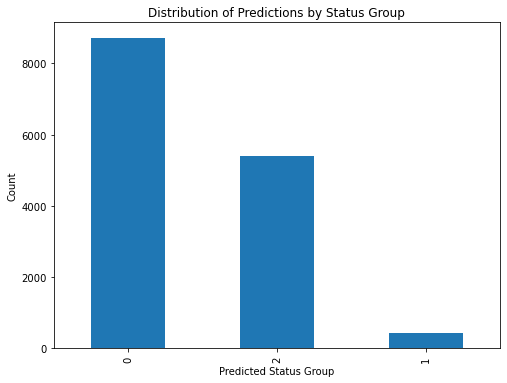

In [43]:
# Prepare test features
X_test = test_data[['funder_encoded', 'installer_encoded', 'scheme_management_encoded', 'permit_encoded', 'permit_missing', 'amount_tsh', 'population']]

# Make predictions
y_test_pred_rf = rf_model.predict(X_test)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({
    'id': test_data['id'],  # Ensure the test data contains the 'id' column
    'predicted_status_group': y_test_pred_rf
})

# Display the first few rows of predictions
print(predictions_df.head())

# Check the distribution of predicted classes
print(predictions_df['predicted_status_group'].value_counts())

# Plot the distribution of predictions
plt.figure(figsize=(8, 6))
predictions_df['predicted_status_group'].value_counts().plot(kind='bar')
plt.xlabel('Predicted Status Group')
plt.ylabel('Count')
plt.title('Distribution of Predictions by Status Group')
plt.show()


#### Feature Importance

In [45]:
importances = rf_model.feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
6                 population    0.343664
0             funder_encoded    0.246288
1          installer_encoded    0.194932
5                 amount_tsh    0.116211
2  scheme_management_encoded    0.081917
3             permit_encoded    0.016987
4             permit_missing    0.000000


# Conclusion

#### 1. Top 3 Critical Factors Influencing Functionality of Water Pumps
>1. **Population** : This is the most important feature, indicating that the population size near a wate pump has a significant impact on its functionality.
>2. **Funders** : The organization or entity funding the pumps shows that there are funders that may have varying standards for pump quality and maintenance.
>3. **Installers**: The company or individual who installed the pump shows that the quality of installation can greatly influence the pump's performance

#### 2. The Role Construction Year Plays in its Current State Functionality
>- `construction_year` shows a moderate correlation with `gps_height` and its `status_group`.
> - This gives us an insight that would inform us that pumps built earlier might be more prone to failure This could inform us on the maintenance schedules.

#### 3. Are there regions that show consistently have non functional or poorly performing water pumps?
>- From the correlation between `region_code` and `district_code` with `status_group` suggests that certain areas might have more challenges, possibly due to environmental or management factors.

# Recommendations

>- Focus on improving conditions in areas with large populations, ensuring proper installations by reliable contractors and scrutinizing the role of different funders in pump maintenance and quality
>- Evaluate older installations of water pumps. Pumps installed in earlier years may require more frequent inspections and maintenance. Having scheduled could help in reducing pump failures.
>- Pumps with low `amount_tsh` values are more likely to be non-functional or in need of repair. Maintenance teams should prioritize these pumps for inspection and potential repair.